# Seattle Bicycling Data

Load the Fremont Bridge bicycling data from `./data/FremontBridge.csv` as a time series, with the _Date_ column as the index. Then:

- Relabel the columns 'East' and 'West' and add a 'Total' column that sums the 'East' and 'West' columns
- Resample the data by week and plot
- Resample the data by day and do a rolling 30 day mean plot
- Plot a 50 day rolling window using a Gaussian window function with a 10 day width of the Gaussian
- Plot the mean counts by hour
- Plot the mean counts by day of the week
- Plot, side by side, mean hourly counts for _weekdays_ and _weekends_

In [1]:
import pandas as pd
data = pd.read_csv('./data/FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


In [2]:
data.columns=['East', 'West']
data.head()

,East,West
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0


In [4]:
data['Total'] = data.eval('East + West')
data.head()

,East,West,Total
Date,,,
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2019-01-01 02:00:00,1.0,11.0,12.0
2019-01-01 03:00:00,1.0,2.0,3.0
2019-01-01 04:00:00,2.0,1.0,3.0


Text(0, 0.5, 'Weekly bicycle count')

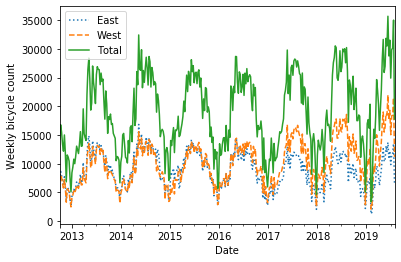

In [7]:
weekly = data.resample('W').sum()
%matplotlib inline
import matplotlib.pyplot as plt
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean daily count')

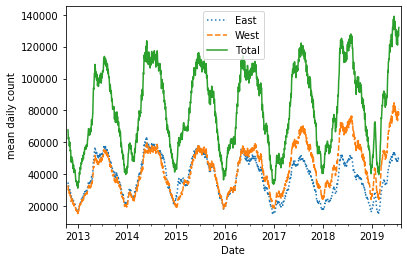

In [15]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean daily count')

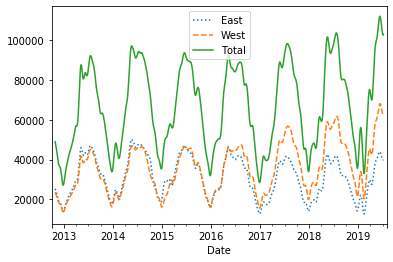

In [16]:
daily.rolling(50, win_type='gaussian', center=True).sum(std=10).plot(style=[':', '--', '-']);

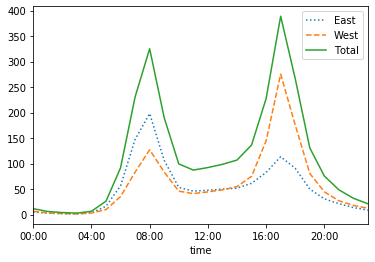

In [29]:
by_time = data.groupby(data.index.time).mean()
import numpy as np
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'])

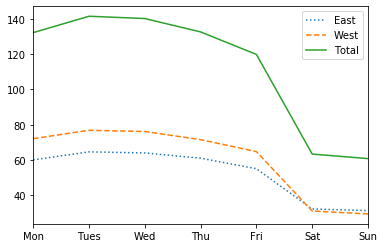

In [43]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'])

In [44]:
weekend = np.where(data.index.dayofweek < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

In [45]:
fig, ax = plt.subplots?

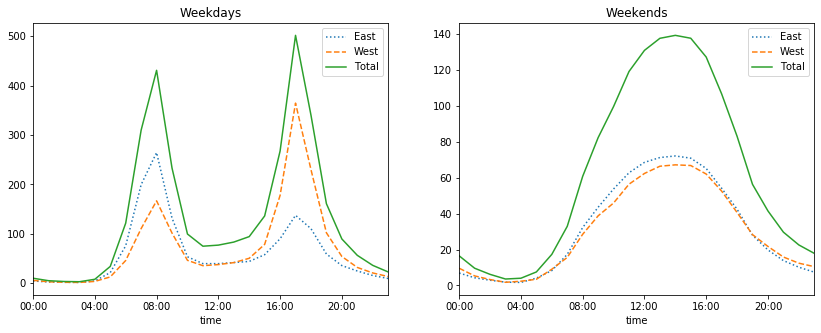

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-'])